# Hypothesis Testing - Unfair Dice 

Once again, we import numpy. This time, we will also import matplotlib which creates well-formatted charts.

In [193]:
import numpy as np
import matplotlib.pyplot as plt

In this case, the array _dice_ represents a die that is more likely to land on lower rolls.

In [215]:
dice = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                 2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                 3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
                 4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
                 5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
                 6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6])
fair_dice = np.array([1,2,3,4,5,6])

Imagine getting your hands on one of these dice for a board game. You're wondering why everyone's getting low rolls but want to prove statistically that the die is unfair. To motivate your investigation, you simulate 2000 dice rolls:

In [216]:
two_thousand_tosses = np.random.choice(dice, 2000)
for i in np.arange(1,7,1):
    print("roll " + str(i) + ": " + str(np.count_nonzero(two_thousand_tosses == i)) + " times")

roll 1: 369 times
roll 2: 337 times
roll 3: 342 times
roll 4: 368 times
roll 5: 314 times
roll 6: 270 times


It does look like there's something wrong with this die. Now, we run the above simulation 10000 times and collect how many times a 6 is rolled in each of those simulations. We'll also simulate 10000 fair dice simulations.

In [230]:
sixes = np.array([])
fair_sixes = np.array([])
for i in np.arange(10000):
    outcomes = np.random.choice(dice, 2000)
    fair_outcomes = np.random.choice(fair_dice, 2000)
    num_6 = np.count_nonzero(outcomes == 6)
    fair_num_6 = np.count_nonzero(fair_outcomes == 6)
    sixes = np.append(sixes, num_6)
    fair_sixes = np.append(fair_sixes, fair_num_6)

For 2000 rolls, we are expecting each number to appear around 2000/6 times. Our observed test statistic in this case is the difference of our actual results (number of times 6 was rolled out of 2000) from the expected number of times (2000/6).

In [231]:
test_statistics = sixes - (2000/6)
test_statistics

array([-23.33333333, -24.33333333,  -8.33333333, ..., -20.33333333,
       -47.33333333, -39.33333333])

This histogram shows what the test statistic distribution looks like for fair dice (orange) and our rigged die (blue).

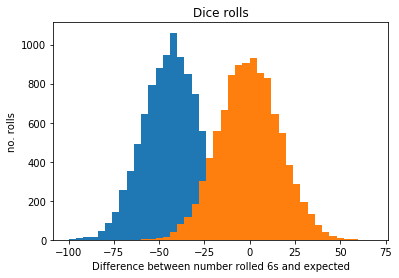

In [232]:
fig,ax = plt.subplots(1,1)
ax.hist(sixes-(2000/6), bins = np.arange(-100,70,4))
ax.hist(fair_sixes-(2000/6), bins = np.arange(-100,70,4))
ax.set_title("Dice rolls")
ax.set_xlabel('Difference between number rolled 6s and expected')
ax.set_ylabel('no. rolls')
plt.show()

Finally, we calculate the probability of receiving our skewed blue distribution under the assumption that the dice obeys the orange distribution. If this probability is lower than 5 percent we can declare the die to be unfair.

In [233]:
sample_mean = np.mean(sixes-(2000/6))
p_value = np.count_nonzero(fair_sixes-(2000/6) < sample_mean)/len(fair_sixes)
p_value

0.0038

A p-value below 0.01 is considered very low. We now have statistical evidence to show that our die is rigged.